In [8]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload 2
from gridworld.agents.vehicles import EVChargingEnv

# Running as a standalone simulator with simple baseline policies (no opendss)

In [11]:
env_config = {
    "num_vehicles": 100,
    "minutes_per_step": 5,
    "max_charge_rate_kw": 7.,
    "peak_threshold": 250.,
    "vehicle_multiplier": 5.,
    "rescale_spaces": False
}

def run_episode(policy, **env_config):

    env = EVChargingEnv(**env_config)
    obs = env.reset()

    done = False
    states = []
    metas = []
    reward = 0.
    while not done:
        action = policy(obs, env)
        obs, rew, done, meta = env.step(action)
        metas.append(meta)
        states.append(obs)
        reward += rew
    print("TOTAL REWARD", reward * env.reward_scale)

    df = pd.DataFrame(np.stack(states), columns=env.obs_labels)

    fig, ax = plt.subplots()
    _ = df[["real_power_unserved", "real_power_consumed"]].plot(ax=ax)
    
    return fig, ax

TOTAL REWARD -1553135.0969122713


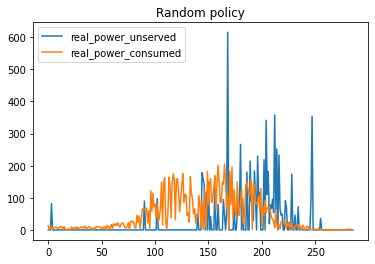

In [12]:
fig, ax = run_episode(lambda o, e: e.action_space.sample(), **env_config)
_ = ax.set_title("Random policy")

TOTAL REWARD -934170.2851237846


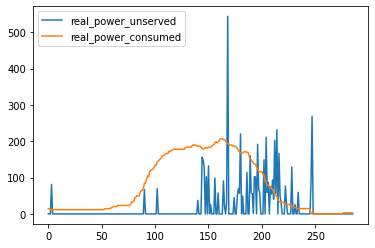

In [13]:
_ = run_episode(lambda o, e: e.action_space.high, **env_config)
_ = ax.set_title("Max charge")

TOTAL REWARD -2659771.95782906


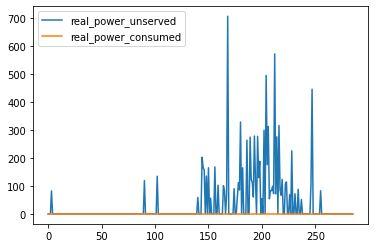

In [14]:
_ = run_episode(lambda o, e: e.action_space.low, **env_config)
_ = ax.set_title("Min charge policy")

TOTAL REWARD -1161670.9270816303


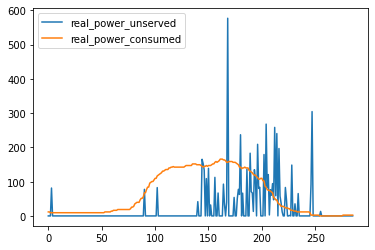

In [15]:
_ = run_episode(lambda o, e: np.array([.8]), **env_config)
_ = ax.set_title("Improved constant policy")